In [1]:
from PyFlyt.core.drones import Rocket
import numpy as np

import gymnasium
import PyFlyt.gym_envs

from stable_baselines3 import DQN, PPO, SAC
from stable_baselines3.common.evaluation import evaluate_policy
from sb3_contrib import TQC
from matplotlib import pyplot as plt
from pathlib import Path
from sb3_contrib import RecurrentPPO


In [13]:
# model_path = Path(r"C:\Users\sudar\Documents\Personal Files\Msc. MLiS\Spring Modules\DIA\Coursework\models\PPO\ppo_rocket_landing_v7.zip")
model_path = Path(r"C:\Users\sudar\Documents\Personal Files\Msc. MLiS\Spring Modules\DIA\Coursework\models\tqc_v1\best_model.zip")
# model_path = Path(r"C:\Users\sudar\Documents\Personal Files\Msc. MLiS\Spring Modules\DIA\Coursework\models\sac_v6\sac_rocket_landing_pretrained_v6.zip")
# model_path = Path(r"C:\Users\sudar\Documents\Personal Files\Msc. MLiS\Spring Modules\DIA\Coursework\models\RPPO_running\recurrent_ppo_model_1000000_steps.zip")

# model = PPO.load(model_path)
model = TQC.load(model_path)
# model = SAC.load(model_path)
# model = RecurrentPPO.load(model_path)

In [14]:
# Render the environment
env = gymnasium.make("PyFlyt/Rocket-Landing-v1", render_mode="human")

obs, info = env.reset()
terminated, truncated = False, False
angular_velocity = []
lin_vel = []

# done = False
while not (terminated or truncated):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    angular_velocity.append(obs[:3])
    lin_vel.append(obs[6:9])

print(f'terminated : {terminated}\nturncated : {truncated}')
print(info)
    # env.render()

                             
terminated : True
turncated : False
{'out_of_bounds': True, 'fatal_collision': False, 'env_complete': False}


In [15]:
env.close()

In [63]:
angular_vel_arr = np.array(angular_velocity)
ang_vel_x = angular_vel_arr[:,0]
ang_vel_y = angular_vel_arr[:,1]
ang_vel_z = angular_vel_arr[:,2]

In [30]:
import numpy as np

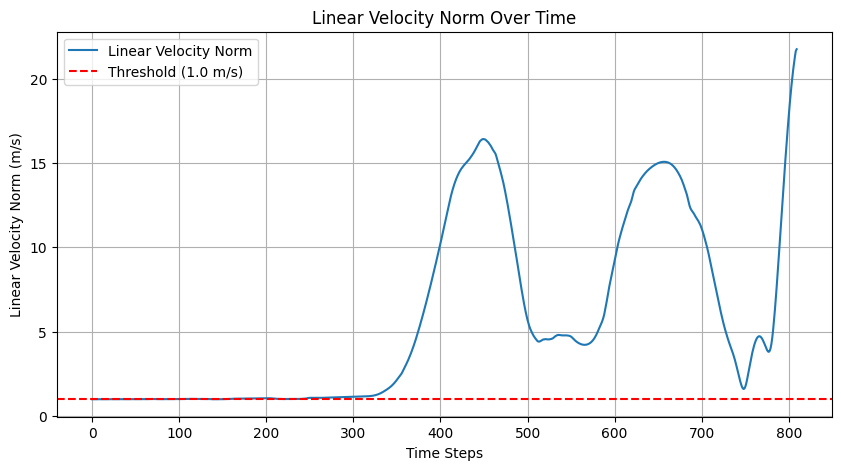

In [12]:
# Create a plot
norm_lin_vel = [np.linalg.norm(val) for val in lin_vel]

plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, len(norm_lin_vel)), norm_lin_vel, label='Linear Velocity Norm')
plt.axhline(y=1.0, color='r', linestyle='--', label='Threshold (1.0 m/s)')
plt.title('Linear Velocity Norm Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Linear Velocity Norm (m/s)')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
norm_val_list[:4]

[9.353472425512988e-07,
 6.352188194309199e-06,
 2.0775975333802068e-05,
 4.748958025891487e-05]

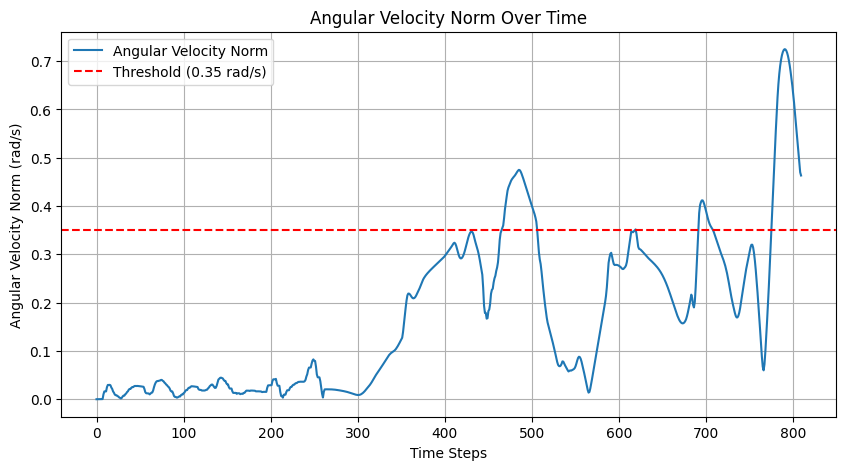

In [11]:
# Create a plot
norm_val_list = [np.linalg.norm(val) for val in angular_velocity]
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, len(norm_val_list)), norm_val_list, label='Angular Velocity Norm')
plt.axhline(y=0.35, color='r', linestyle='--', label='Threshold (0.35 rad/s)')
plt.title('Angular Velocity Norm Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Angular Velocity Norm (rad/s)')
plt.legend()
plt.grid(True)
plt.show()

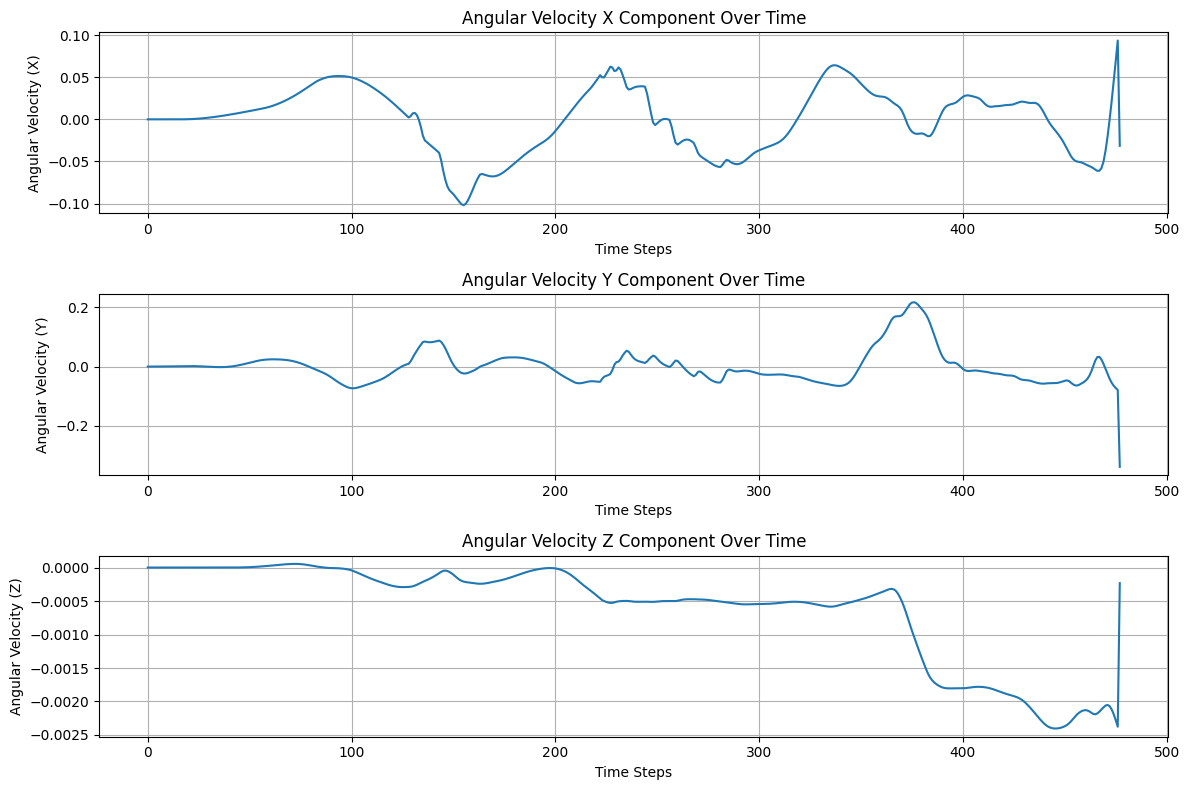

In [29]:
plt.figure(figsize=(12, 8))

# Plot Angular Velocity X
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(ang_vel_x, label='X Component')
plt.title('Angular Velocity X Component Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Angular Velocity (X)')
plt.grid(True)

# Plot Angular Velocity Y
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot(ang_vel_y, label='Y Component')
plt.title('Angular Velocity Y Component Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Angular Velocity (Y)')
plt.grid(True)

# Plot Angular Velocity Z
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(ang_vel_z, label='Z Component')
plt.title('Angular Velocity Z Component Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Angular Velocity (Z)')
plt.grid(True)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

In [3]:
import gymnasium as gym

In [7]:
env = gym.make("PyFlyt/Rocket-Landing-v1", render_mode=None)


In [5]:
action_space  = env.action_space
if isinstance(action_space, gym.spaces.Box):
    print("Box Shape:", action_space.shape)
    print("Low Bound:", action_space.low)
    print("High Bound:", action_space.high)
elif isinstance(action_space, gym.spaces.Discrete):
    print("Number of Discrete Actions:", action_space.n)
elif isinstance(action_space, gym.spaces.MultiDiscrete):
    print("Multi-Discrete Shapes:", action_space.nvec)
elif isinstance(action_space, gym.spaces.MultiBinary):
    print("Number of Binary Actions:", action_space.n)

Box Shape: (7,)
Low Bound: [-1. -1. -1.  0.  0. -1. -1.]
High Bound: [1. 1. 1. 1. 1. 1. 1.]


In [6]:
combined_space 

Box([-1. -1. -1.  0.  0. -1. -1.], 1.0, (7,), float64)

In [7]:
model.observation_space

Box([ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf
  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf
  -inf  -inf  -inf  -inf  -inf    0. -500. -500. -500.], [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf
  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf
  inf   1. 500. 500. 500.], (33,), float64)

In [11]:
gym.spaces.Box(
            low=np.zeros(model.observation_space.shape), 
            high=np.ones(model.observation_space.shape),
            dtype=np.float32
        )

Box(0.0, 1.0, (33,), float32)

In [9]:
import gymnasium as gym

In [13]:
int(1.98e3)

1980